# Approach 3
From approach 2) we get the top 10 trackers, then track their counts throughout the popularity (x axis = popularity, y axis = count for top# tracker, 10 graphs total)

analytics.js

conversion_async.js

advert.gif

tag.js

ga.js

watch.js

shopify-boomerang-1.0.0.min.js

insight.min.js

bat.js

e-202040.js

---------- 
In approach 3, we will take a look at how prelavent google, yandex, and other companies compare in the popularity graph. In this, we will be using the top 10 tracker files. 
## The beginning code is Approach 2's code, Approach 3 begins near the end.

In [24]:
# Constants used in the program:
# URL_DATA_FOLDER is where all the data  is saved.
URL_DATA_FOLDER = "../../popularity_01182021/"

# ALEXA TOP 1M file
ALEXA_TOP_1M_FILEPATH = "../../popularity_01182021/alexa-top1m-2020-09-03_0900_UTC.csv"

# COMPANY_FILE_OUTPUT is where the COMPANY bar graph will be outputted to
COMPANY_FILE_OUTPUT = './company_popular_tracker_count.pdf'

In [12]:
top_10_trackers = ["analytics.js", "conversion_async.js", "advert.gif", "tag.js", 
                   "ga.js", "watch.js", "shopify-boomerang-1.0.0.min.js", "insight.min.js", 
                   "bat.js", "e-202040.js"]


In [13]:
import json 
import os

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [15]:
# Alexa top 1m sorted by popularity
popularity_list = []
with open(ALEXA_TOP_1M_FILEPATH, 'r') as f:
    lines = f.read().splitlines()
    for line in lines:
        popularity_list.append(line.split(",")[1])

In [16]:
# From output:
# website_url + "$$" + json.dumps(tracker_urls) + "$$" + json.dumps(ads_urls) + "$$" + json.dumps(other_urls)
websites = {}
for root, dirs, files in os.walk(URL_DATA_FOLDER, topdown=False):
    for name in files:
        # goes through the data generated from the branch-analysis script
        if('urls' in name):
            filePath = os.path.join(root, name)
            print(filePath)
            with open(filePath, 'r') as f:
                lines = f.read().splitlines()
                for line in lines:
                    fields = line.split("$${")
                    url = fields[0]
#                     print(url)
                    trackers = json.loads("{" + fields[1])
                    ads = json.loads("{" + fields[2])
                    others = json.loads("{" + fields[3])
                    websites[url] = {}
                    websites[url]["trackers"] = trackers
                    websites[url]["ads"] = ads
                    websites[url]["others"] = others
                    

../../popularity_01182021/13\output\urls_0.txt
../../popularity_01182021/13\output\urls_1.txt
../../popularity_01182021/13\output\urls_2.txt
../../popularity_01182021/13\output\urls_3.txt
../../popularity_01182021/13\output\urls_4.txt
../../popularity_01182021/13\output\urls_5.txt
../../popularity_01182021/13\output\urls_6.txt
../../popularity_01182021/13\output\urls_7.txt
../../popularity_01182021/14\output\urls_0.txt
../../popularity_01182021/14\output\urls_1.txt
../../popularity_01182021/14\output\urls_2.txt
../../popularity_01182021/14\output\urls_3.txt
../../popularity_01182021/14\output\urls_4.txt
../../popularity_01182021/14\output\urls_5.txt
../../popularity_01182021/14\output\urls_6.txt
../../popularity_01182021/14\output\urls_7.txt
../../popularity_01182021/15\output\urls_0.txt
../../popularity_01182021/15\output\urls_1.txt
../../popularity_01182021/15\output\urls_2.txt
../../popularity_01182021/15\output\urls_3.txt
../../popularity_01182021/15\output\urls_4.txt
../../popular

In [25]:
# Aggregate trackers and ads by truncation
popular_trackers = {}
popular_ads = {}
for website in popularity_list:
    if website in websites:
        for tracker in websites[website]["trackers"]:
            old_tracker = tracker
            tracker = tracker.split("?")[0]
            if tracker not in popular_trackers:
                popular_trackers[tracker] = {}
                popular_trackers[tracker]["count"] = 1
                popular_trackers[tracker]["bytes"] = websites[website]["trackers"][old_tracker]["total_bytes"]
            else:
                popular_trackers[tracker]["count"] += 1
                popular_trackers[tracker]["bytes"] += websites[website]["trackers"][old_tracker]["total_bytes"]
        for ad in websites[website]["ads"]:
            old_ad = ad
            ad = ad.split("?")[0]
            if ad not in popular_ads:
                popular_ads[ad] = {}
                popular_ads[ad]["count"] = 1
                popular_ads[ad]["bytes"] = websites[website]["ads"][old_ad]["total_bytes"]
            else:
                popular_ads[ad]["count"] += 1
                popular_ads[ad]["bytes"] += websites[website]["ads"][old_ad]["total_bytes"]


In [26]:
for ad in popular_ads:
    if popular_ads[ad]["count"] >= 10000:
        print(ad)
print("====================================================")
for tracker in popular_trackers:
    if popular_trackers[tracker]["count"] >= 10000:
        print(tracker)

https://securepubads.g.doubleclick.net/gampad/ads
https://tpc.googlesyndication.com/safeframe/1-0-37/html/container.html
https://securepubads.g.doubleclick.net/tag/js/gpt.js
https://securepubads.g.doubleclick.net/gpt/pubads_impl_2020092201.js
https://securepubads.g.doubleclick.net/pcs/view
https://pagead2.googlesyndication.com/getconfig/sodar
https://tpc.googlesyndication.com/sodar/sodar2.js
https://tpc.googlesyndication.com/sodar/sodar2/216/runner.html
https://securepubads.g.doubleclick.net/pagead/adview
https://tpc.googlesyndication.com/sodar/sodar2/217/runner.html
https://pagead2.googlesyndication.com/pagead/js/r20200923/r20190131/show_ads_impl_fy2019.js
https://googleads.g.doubleclick.net/pagead/html/r20200923/r20190131/zrt_lookup.html
https://googleads.g.doubleclick.net/pagead/ads
https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js
https://pagead2.googlesyndication.com/pagead/gen_204
https://www.googleadservices.com/pagead/conversion.js
https://pagead2.googlesyndication

# Required Code from Approach 2

In [27]:
# Approach 2
count_trackers_list = [] # [   [count for top 10k with 1st tracker, top 20k...]        [1,5,6030,202,32]  []
popular_tracker_pos = 0
for popular_tracker in top_10_trackers:
    website_count = 0
    bucket_count = 0
    count_trackers_list.append(list())
    for website in popularity_list:
        if(website_count == 0):
            website_count += 1
            continue
        if website in websites:
            for tracker in websites[website]["trackers"]:
                if popular_tracker in tracker:
                    if bucket_count >= len(count_trackers_list[popular_tracker_pos]):
                        count_trackers_list[popular_tracker_pos].append(0)
                    count_trackers_list[popular_tracker_pos][bucket_count] += 1
            
            if website_count % 10000 == 0:
                bucket_count += 1
            website_count += 1
    popular_tracker_pos += 1

------------------
# Approach 3 Code Starts Here

I only look at the top ten tracker files and their impacts on tracker counts over popularity, I do not look at every tracker and try to 

In [28]:
total_trackers = 0
total_popular_trackers = 0

for website in popularity_list:
    if website in websites:
        for tracker in websites[website]["trackers"]:
            old_tracker = tracker
            tracker = tracker.split("?")[0]
            total_trackers += 1
for popular_tracker in count_trackers_list:
    for count in popular_tracker:
        total_popular_trackers += count
        


print(total_popular_trackers / total_trackers)

0.24240819300000926


In [29]:
import numpy as np

# try bucketing into Google, Yandex, and other
google_trackers = np.zeros(len(popular_tracker))
yandex_trackers = np.zeros(len(popular_tracker))
other_trackers = np.zeros(len(popular_tracker))


'''
0) analytics.js
1) conversion_async.js
2) advert.gif
3) tag.js
4) ga.js
5) watch.js
6) shopify-boomerang-1.0.0.min.js
7) insight.min.js
8) bat.js
9) e-202040.js
'''


popular_count = 0
for popular_tracker in count_trackers_list:
    if(popular_count == 0 or popular_count == 1 or popular_count == 4): #GOOGLE
        for count in range(0,len(popular_tracker)):
            google_trackers[count] += popular_tracker[count]
    elif(popular_count == 2 or popular_count == 3 or popular_count == 5): # YANDEX
        for count in range(0,len(popular_tracker)):
            yandex_trackers[count] += popular_tracker[count]
    else: # OTHER
        for count in range(0,len(popular_tracker)):
            other_trackers[count] += popular_tracker[count]
    popular_count += 1
        
            


In [30]:
google_trackers
yandex_trackers
other_trackers

array([1654., 1428., 1559., 1434., 1443., 1360., 1635., 1548., 1580.,
       1829., 1631., 1819., 1932., 1797., 2188., 1664., 2041., 1349.,
       1744., 1770., 1575., 1352., 2193., 1827., 1127., 1072., 1380.,
       1232., 2209., 2371., 2270., 2481., 1728., 1077., 1023., 1250.,
       1083.,  657., 1066., 1009., 1068., 1016., 1200.,  655.,  670.,
        674.,  984.,  364.,  747., 1040.,  836.,  765.,  290.,  176.,
        270.,  450.,  476.,  476.,  253.,  692.,  580.,  441.,  478.,
        223.,  326.,  744.,  454.,  671.])

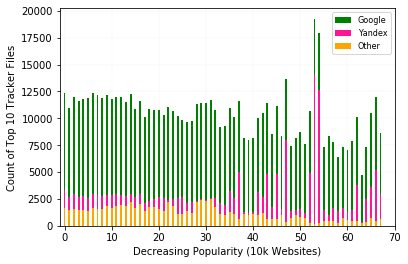

In [33]:
x = list(range(0,len(google_trackers), 1))

# fig = plt.figure(figsize=(25, 20))
fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.bar(x,google_trackers, width=0.4, label = 'Google', color ='green', bottom = yandex_trackers + other_trackers)
plt.bar(x,yandex_trackers, width=0.4, label = 'Yandex', color ='deeppink', bottom = other_trackers )
plt.bar(x,other_trackers, width=0.4, label = 'Other', color ='orange' )


# plt.xticks(x, x,  rotation=90)
plt.ylabel("Count of Top 10 Tracker Files")
plt.xlabel("Decreasing Popularity (10k Websites)")
plt.legend(loc="upper right", prop={'size': 8})

plt.xlim([-1,70])

ax.set_axisbelow(True)
plt.grid(color='#888888', linestyle=':', linewidth=0.1)


plt.savefig(COMPANY_FILE_OUTPUT, format='pdf')
plt.show()